In [68]:
import numpy as np

In [20]:
#data setup
import pandas as pd

df = pd.read_csv("/Users/tina/Documents/School/ML1/SMUMSDS-ML1/cardio_train.csv", sep=";")

if 'cardio' in df:
    y = df['cardio'].values # get the labels we want
    del df['cardio'] # get rid of the class label
    X = df.values # use everything else to predict!


## Plain default everything in the model

In [21]:
#make CV spit 80/20 object
from sklearn.model_selection import ShuffleSplit

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object



In [23]:
iter_num=0
for train_indices, test_indices in cv_object.split(X,y): 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    lr_clf.fit(X_train,y_train)
    y_hat = lr_clf.predict(X_test)

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1

====Iteration 0  ====
accuracy 0.7081428571428572
confusion matrix
 [[5198 1792]
 [2294 4716]]
====Iteration 1  ====
accuracy 0.7025714285714286
confusion matrix
 [[5258 1812]
 [2352 4578]]
====Iteration 2  ====
accuracy 0.7067857142857142
confusion matrix
 [[5209 1770]
 [2335 4686]]


### SVM

In [29]:
#train test split again
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Scale the data
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()
scl_obj = std_scl.fit(X_train) #fit scaler on train

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

In [30]:
#try svm with sgdclassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

#scale with pipeline
clf = make_pipeline(StandardScaler(),
                     SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)

y_hat = clf.predict(X_test)
acc = mt.accuracy_score(y_test, y_hat)
conf = mt.confusion_matrix(y_test, y_hat)

print("=====")
print('accuracy:', acc )
print(conf)

=====
accuracy: 0.7074733766845727
[[3522 1102]
 [2002 3985]]


# Clean data

In [31]:
df = pd.read_csv("/Users/tina/Documents/School/ML1/SMUMSDS-ML1/cardio_train.csv", sep=";")

# We address the weight with reasonable weight, the other values probably are a mistake
df = df[df["weight"] < 200]
df = df[df["weight"] > 55]

# We address the height, the other values probably are a mistake
df = df[df["height"] < 200]
df = df[df["height"] > 130]

# Keeping only reasonable blood pressure measurements
df = df[df["ap_hi"] < 200]
df = df[df["ap_hi"] > 110]
df = df[df["ap_lo"] < 150]
df = df[df["ap_lo"] > 60]


if 'cardio' in df:
    y = df['cardio'].values # get the labels we want
    del df['cardio'] # get rid of the class label
    X = df.values # use everything else to predict!


## train test split

In [32]:
#make CV spit 80/20 object
from sklearn.model_selection import ShuffleSplit

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)

## logistic on clean data

In [33]:
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.69607012 0.69343134 0.69465649]


## SVM on clean data

In [42]:
svm_clf = SGDClassifier(max_iter=1000, tol=1e-3)

accuracies = cross_val_score(svm_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.54443502 0.56903214 0.45075865]


# Add new features

In [35]:
# compute the body mass index based on weight and height
df['bmi'] = df['weight'] / (df['height']/100)**2

X = df.values

### Logistic regression with new features

In [36]:
#lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object
#lr_clf.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.70747338 0.708887   0.70709641]


### SVM with new features

In [40]:
svm_clf = SGDClassifier(max_iter=1000, tol=1e-3)

accuracies = cross_val_score(svm_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.52831967 0.55810008 0.50626708]


# Scaling

### Logistic Regression Scaled

In [39]:
lr_clf = make_pipeline(StandardScaler(), LogisticRegression())

accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object)
print(accuracies)

[0.72368297 0.71708604 0.71246819]


### SVM Scaled

In [41]:
svm_clf = make_pipeline(StandardScaler(),
                     SGDClassifier(max_iter=1000, tol=1e-3))

accuracies = cross_val_score(svm_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)

[0.71312789 0.71416455 0.71209123]


## Scale only the numeric features

### Pipeline setup for scaling numeric and one hot encoding categorical

In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

numeric_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])



### Logistic Regression

In [74]:
lr_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

for i in range(0, 3):
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
    lr_clf.fit(X_train, y_train)
    print("model score: %.3f" % lr_clf.score(X_test, y_test))

model score: 0.721
model score: 0.717
model score: 0.713


### SVM

In [75]:
svm_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  SGDClassifier(max_iter=1000, tol=1e-3))])

for i in range(0, 3):
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
    svm_clf.fit(X_train, y_train)
    print("model score: %.3f" % svm_clf.score(X_test, y_test))

model score: 0.723
model score: 0.711
model score: 0.715


# Binning Continuous Variables

### Make bins of blood pressure and BMI

In [78]:
# bin blood pressure groups based on the api hi/ lo variables
df['bpGrp'] = np.where((df.ap_hi < 120) & (df.ap_lo < 80), 1, 0)
df['bpGrp'] = np.where((df.ap_hi >= 120) & (df.ap_hi < 130) & (df.ap_lo < 80), 2, df.bpGrp)
df['bpGrp'] = np.where((df.ap_hi >= 130) & (df.ap_hi < 140) | ((df.ap_lo >= 80) & (df.ap_lo < 90)), 3, df.bpGrp)
df['bpGrp'] = np.where((df.ap_hi >= 140) | (df.ap_lo >= 90), 4, df.bpGrp)
df['bpGrp'] = np.where((df.ap_hi > 180) | (df.ap_lo > 120), 5, df.bpGrp)
df['bpGrp'] = pd.cut(df.bpGrp,[0,1,2,3,4,5],5,labels=['Normal','Elevated','Hyper_Stage1','Hyper_Stage2','Hyper_Stage3' ])

# bin bmi
df['bmiGrp'] = np.where((df.bmi < 18.5), 1, 0)
df['bmiGrp'] = np.where((df.bmi >= 18.5) & (df.bmi < 25), 2, df.bmiGrp)
df['bmiGrp'] = np.where((df.bmi >= 25) & (df.bmi < 30), 3, df.bmiGrp)
df['bmiGrp'] = np.where((df.bmi >= 30), 4, df.bmiGrp)
df['bmiGrp'] = pd.cut(df.bmiGrp,[0,1,2,3,4],4,labels=['Under Weight','Normal Weight','Over Weight','Obese' ]) 

### Pipeline setup

In [79]:
numeric_features = ['age', 'height', 'weight']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bpGrp', 'bmiGrp']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### Logistic Regression

In [80]:
lr_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

for i in range(0, 3):
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
    lr_clf.fit(X_train, y_train)
    print("model score: %.3f" % lr_clf.score(X_test, y_test))

model score: 0.716
model score: 0.710
model score: 0.715


### SVM

In [81]:
svm_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SGDClassifier(max_iter=1000, tol=1e-3))])

for i in range(0, 3):
    X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
    svm_clf.fit(X_train, y_train)
    print("model score: %.3f" % svm_clf.score(X_test, y_test))

model score: 0.705
model score: 0.706
model score: 0.718


# Hyperparameter Tuning

In [101]:
#this is not working right now
from sklearn.model_selection import GridSearchCV
from sklearn.utils.fixes import loguniform

parameters = {'classifier__penalty':('l1', 'l2', 'elasticnet', 'none'), 
              'classifier__C': [.1, 1, 10, 100],
             'classifier__solver': ['saga']}
lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())])
clf = GridSearchCV(lr, parameters)
clf.fit(X, y)


sorted(clf.cv_results_.keys())

/Users/tina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tina/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/tina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
/Users/tina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score o

/Users/tina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/tina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tina/opt/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/tina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1313, in fit
    " got (l1_ratio=%r)" % self.l1_ratio)
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
/Users/tina/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score o

/Users/tina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/tina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/tina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/tina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_classifier__C',
 'param_classifier__penalty',
 'param_classifier__solver',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# Most Useful Variables

In [48]:

scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train_scaled = scl_obj.transform(X_train)
X_test_scaled = scl_obj.transform(X_test)

lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear')
lr_clf.fit(X_train_scaled,y_train)

y_hat = lr_clf.predict(X_test_scaled)

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.7114315333144849
[[3347 1277]
 [1785 4202]]
active has weight of -0.08774409883481911
gluc has weight of -0.08277560611716339
alco has weight of -0.052504223730319086
smoke has weight of -0.03970324217891877
height has weight of -0.03159795612876973
gender has weight of -0.00748872768537185
id has weight of 0.012278828335752839
weight has weight of 0.10096996547759943
ap_lo has weight of 0.13060303980763813
age has weight of 0.29796110516040325
cholesterol has weight of 0.33014971561782325
ap_hi has weight of 0.9105728888976545


### precision recall curve

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53053 entries, 1 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           53053 non-null  int64  
 1   age          53053 non-null  int64  
 2   gender       53053 non-null  int64  
 3   height       53053 non-null  int64  
 4   weight       53053 non-null  float64
 5   ap_hi        53053 non-null  int64  
 6   ap_lo        53053 non-null  int64  
 7   cholesterol  53053 non-null  int64  
 8   gluc         53053 non-null  int64  
 9   smoke        53053 non-null  int64  
 10  alco         53053 non-null  int64  
 11  active       53053 non-null  int64  
 12  bmi          53053 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 5.7 MB


Text(0.5, 1.0, '2-class Precision-Recall curve: ')

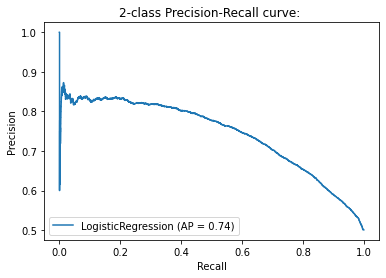

In [36]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(lr_clf, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ')

Logistic: ROC AUC=0.743


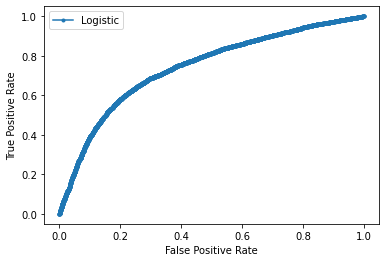

In [14]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

lr_clf.fit(X_train, y_train)

# predict probabilities
lr_probs = lr_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores\
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Look at Support Vectors

In [19]:
import sklearn
sklearn.__version__

'0.23.2'

In [47]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)


#scale
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

# train the model
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.7121973695233308
[[16425  4581]
 [ 9161 17581]]


In [48]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(3552, 13)
(3552,)
[1777 1775]


[[-0.00360324  0.10440692 -0.01069967 -0.16460268  0.3582464   1.15765979
   0.14242914  0.35304275 -0.04852486 -0.01851078 -0.01373462 -0.0387172
  -0.29033337]]


<AxesSubplot:>

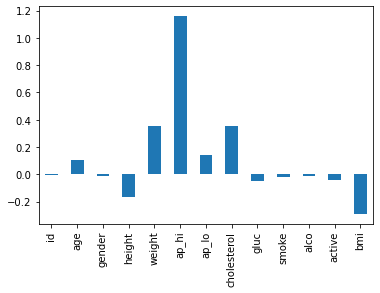

In [50]:
# train the model
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

# if using linear kernel, these make sense to look at (not otherwise, why?)
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=df.columns)
weights.plot(kind='bar')

In [69]:
df = pd.read_csv("/Users/tina/Documents/School/ML1/SMUMSDS-ML1/cardio_train.csv", sep=";")

df = df[df["weight"] < 200]
df = df[df["weight"] > 55]
df = df[df["height"] < 200]
df = df[df["height"] > 130]
df = df[df["ap_hi"] < 200]
df = df[df["ap_hi"] > 110]
df = df[df["ap_lo"] < 150]
df = df[df["ap_lo"] > 60]

df['bmi'] = df['weight'] / (df['height']/100)**2

if 'cardio' in df:
    y = df['cardio'].values # get the labels we want
    del df['cardio'] # get rid of the class label
    X = df.values # use everything else to predict!
    
cv_object =  ShuffleSplit(n_splits=1,
                         test_size  = 0.9)

#train test split
for train_indices, test_indices in cv_object.split(X, y):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    scl_obj = StandardScaler()
    scl_obj.fit(X_train)
    
    X_train_scaled = scl_obj.transform(X_train)
    X_test_scaled = scl_obj.transform(X_test) 
        

# train the model
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object
    
# make a dataframe of the training data
df_tested_on = df.iloc[train_indices].copy() # saved from above, the indices chosen for training

# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:].copy()

df_support['cardio'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
df['cardio'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3542 entries, 11650 to 62503
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3542 non-null   int64  
 1   age          3542 non-null   int64  
 2   gender       3542 non-null   int64  
 3   height       3542 non-null   int64  
 4   weight       3542 non-null   float64
 5   ap_hi        3542 non-null   int64  
 6   ap_lo        3542 non-null   int64  
 7   cholesterol  3542 non-null   int64  
 8   gluc         3542 non-null   int64  
 9   smoke        3542 non-null   int64  
 10  alco         3542 non-null   int64  
 11  active       3542 non-null   int64  
 12  bmi          3542 non-null   float64
 13  cardio       3542 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 415.1 KB


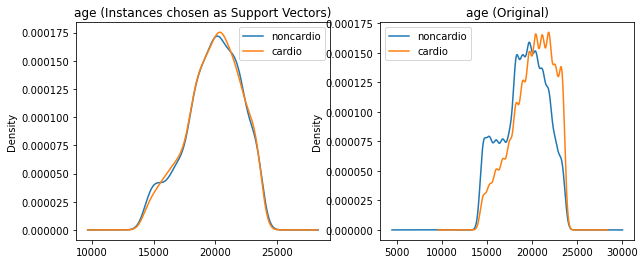

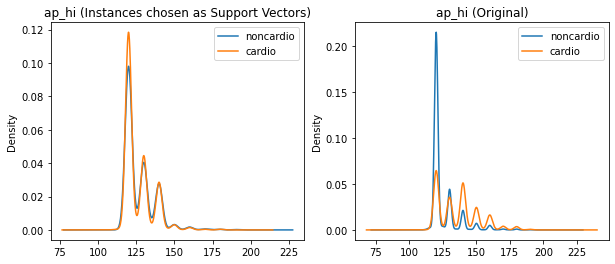

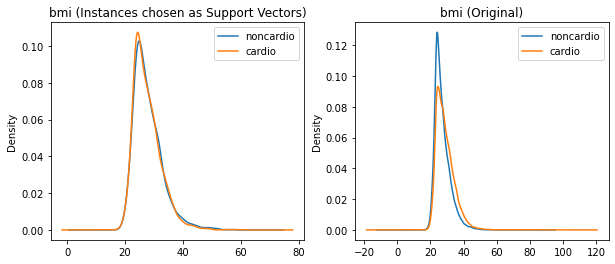

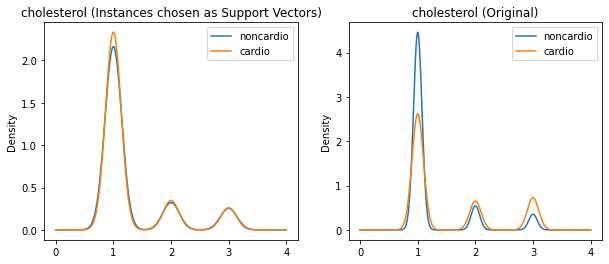

In [70]:

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['cardio'])
df_grouped = df.groupby(['cardio'])

# plot KDE of Different variables
vars_to_plot = ['age','ap_hi','bmi','cholesterol']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['noncardio','cardio'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['noncardio','cardio'])
    plt.title(v+' (Original)')




## pca

In [75]:
%%time
# now lets use some of what we know from this class to reduce the dimensionality of the set
from sklearn.decomposition import PCA
n_components = 10

pca = PCA(n_components=n_components, svd_solver='randomized')

iterations = 500
log_sgd = SGDClassifier(
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='log', max_iter=iterations, n_jobs=-1, penalty='l2')

# you could also set this up in a pipeline
for train_idx, test_idx in cv_object.split(X,y):
    log_sgd.fit(pca.fit_transform(X[train_idx]),y[train_idx])
    yhat = log_sgd.predict(pca.transform(X[test_idx]))
    
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print('Logistic Regression:', acc)

Logistic Regression: 0.5303258775236659
CPU times: user 333 ms, sys: 35.7 ms, total: 369 ms
Wall time: 226 ms
